In [2]:
from google.colab import files
uploaded = files.upload()

Saving nyc_taxi_trip_duration.csv to nyc_taxi_trip_duration.csv


In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import zipfile
import io
df = pd.read_csv(io.BytesIO(uploaded['nyc_taxi_trip_duration.csv']))
# Dataset is now stored in a Pandas Dataframe

In [78]:
df.shape

(729322, 11)

In [79]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2/29/2016 16:40,2/29/2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,3/11/2016 23:35,3/11/2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2/21/2016 17:59,2/21/2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,1/5/2016 9:44,1/5/2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2/17/2016 6:42,2/17/2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [80]:
df.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [81]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [83]:

#Finding the min max values of cont variables:

numerical_cols=df.select_dtypes(include=['int64',"float"]).columns
print(numerical_cols)

print("/n")

#numerical_cols=df.select_dtypes(include=['int64',"float"]).column
#print(df[numerical_cols].max())
#print(df[numerical_cols].min())
for i in numerical_cols:
  print("the range of numerical cols:",i,"[",df[i].min(),":",df[i].max(),"]")

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')
/n
the range of numerical cols: vendor_id [ 1 : 2 ]
the range of numerical cols: passenger_count [ 0 : 9 ]
the range of numerical cols: pickup_longitude [ -121.933342 : -65.89738464 ]
the range of numerical cols: pickup_latitude [ 34.7122345 : 51.88108444 ]
the range of numerical cols: dropoff_longitude [ -121.9333038 : -65.89738464 ]
the range of numerical cols: dropoff_latitude [ 32.1811409 : 43.92102814 ]
the range of numerical cols: trip_duration [ 1 : 1939736 ]


In [84]:
#categorical variables as follows
categorical_cols=df.select_dtypes(include=['object']).columns
categorical_cols

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

In [85]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]	


Number of duplicate rows = 0


In [86]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

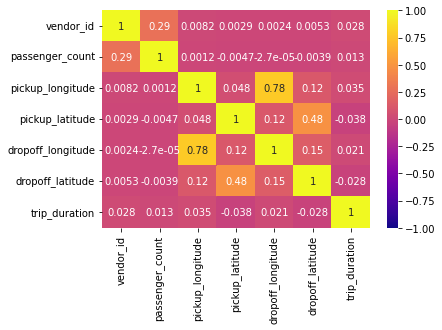

In [87]:
sns.heatmap(df.corr(),annot=True,cmap="plasma",vmin=-1,vmax=1)

In [88]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712235,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.


Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.


The minimum trip duration is also quite low. We will come back to this later during Univariate Analysis

In [89]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       223893
dropoff_datetime      224158
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

We see that id has 729322 unique values which are equal to the number of rows 
in our dataset.

There are 2 unique vendor ids.

There are 9 unique passenger counts.

There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.



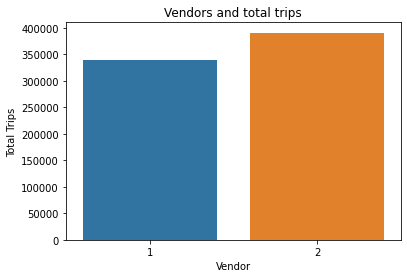

In [92]:
#barplt on vendor id and total trips:

vendors=df['vendor_id'].value_counts()
sns.barplot(x=vendors.index,y=vendors.values)
plt.xlabel('Vendor')
plt.ylabel('Total Trips')
plt.title("Vendors and total trips")
plt.show()

the Maximum passenger 9
the Minimum passenger 0


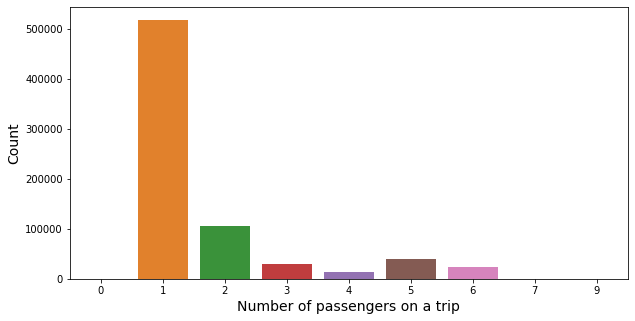

In [93]:
passenger_count=df["passenger_count"]
print("the Maximum passenger",max(passenger_count))
print("the Minimum passenger",min(passenger_count))

passenger_count=df['passenger_count'].value_counts()
fig = plt.figure(figsize=(10,5))

sns.barplot(x=passenger_count.index,y=passenger_count.values)
plt.xlabel('Number of passengers on a trip', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Feature Creation

 using datetime function:

In [94]:
# Lets move on to Pickup and Drop off columns

# Converting to datetime

df["pickup_datetime"]=pd.to_datetime(df['pickup_datetime'])
df["dropoff_datetime"]=pd.to_datetime(df['dropoff_datetime'])


In [95]:
df['pickup_dayname']=df['pickup_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day

In [96]:
df['dropoff_dayname']=df['dropoff_datetime'].dt.day_name()
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['dropoff_month']=df['dropoff_datetime'].dt.month
df['dropoff_day'] = df['dropoff_datetime'].dt.day

Importing the library which lets us calculate distance from geographical coordinates.

Defining a function to take coordinates as inputs and return us distance.


In [97]:
from geopy.distance import great_circle

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [98]:
df["distance"] = df.apply(lambda x: cal_distance(x["pickup_latitude"],x["pickup_longitude"],x["dropoff_latitude"],x["dropoff_longitude"] ), axis=1)

In [99]:
def time_day(x):
  if x in range(6,12):
    return "Morning"
  elif x in range(12,16):
    return "Afternoon"
  elif x in range(16,22):
    return "Evening"
  else:
    return "Late night"

df["pickup_timeofday"]=df["pickup_hour"].apply(time_day)

df["dropoff_timeofday"]=df["dropoff_hour"].apply(time_day)

In [100]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_day,dropoff_dayname,dropoff_day_no,dropoff_hour,dropoff_month,dropoff_day,distance,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2,29,Monday,0,16,2,29,1.199074,Evening,Evening
1,id0889885,1,2016-03-11 23:35:00,2016-03-11 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,11,Friday,4,23,3,11,4.129117,Late night,Late night
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2,21,Sunday,6,18,2,21,7.250763,Evening,Evening
3,id3744273,2,2016-01-05 09:44:00,2016-01-05 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,5,Tuesday,1,10,1,5,2.361100,Morning,Morning
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,17,Wednesday,2,6,2,17,4.328540,Morning,Morning


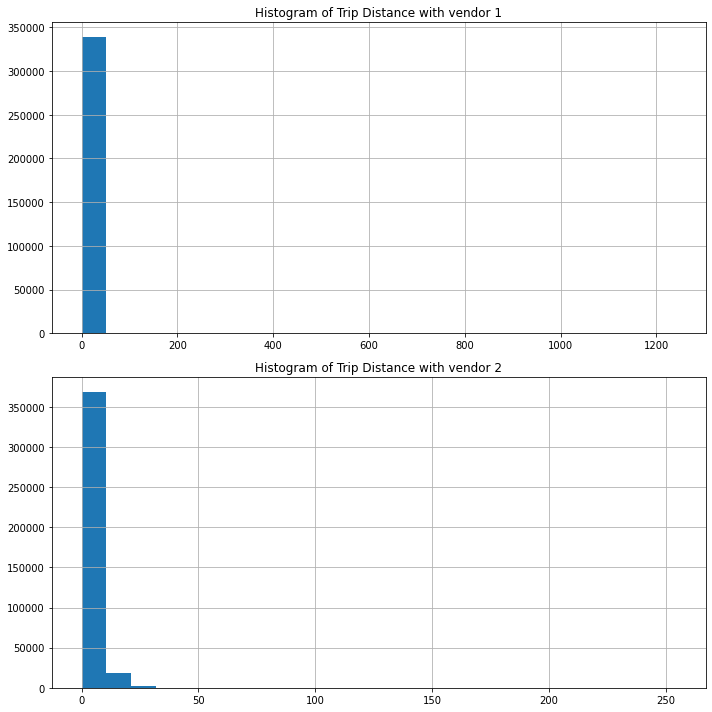

In [101]:

# define the figure with 2 subplots
figure,ax = plt.subplots(nrows=2,ncols=1,figsize = (10,10)) 
# histogram of the number of trip distance
data1=df[df["vendor_id"]==1]
data2=df[df["vendor_id"]==2]
#sns.countplot(data=data, x="distance",ax=ax[0])
data1.distance.hist(bins=24,ax=ax[0])
ax[0].set_title('Histogram of Trip Distance with vendor 1')
data2.distance.hist(bins=24,ax=ax[1])
#sns.histplot(data=data2, x="distance",ax=ax[1])
ax[1].set_title('Histogram of Trip Distance with vendor 2')
plt.tight_layout()

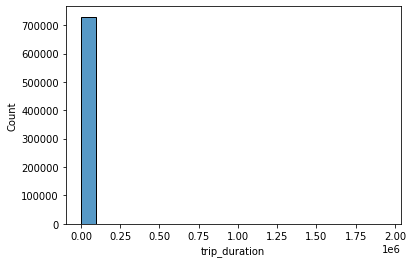

In [103]:
#Univariate Analysis
sns.histplot(df['trip_duration'],kde=False,bins=20)

The histogram is really skewed as we can see.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


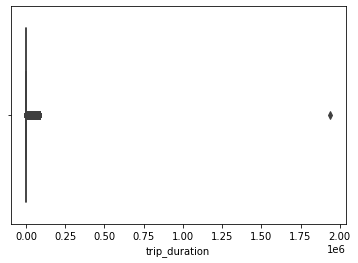

In [33]:
sns.boxplot(df["trip_duration"])

We can clearly see an outlier.

We can see that there is an entry which is significantly different from others.

As there is a single row only, let us drop this row

In [34]:
df.trip_duration.sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [35]:
df.drop(df[df["trip_duration"]==1939736].index,inplace=True)

In [107]:
df["passenger_count"].value_counts(ascending=False)

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

There are some trips with even 0 passenger count.

There is only 1 trip each for 7 and 9 passengers.

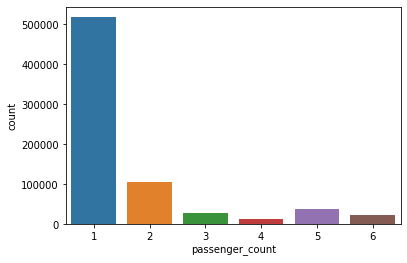

In [104]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]
sns.countplot(x='passenger_count',data=df)

We see the highest amount of trips are with 1 passenger.

Let us remove the rows which have 0 or 7 or 9 passenger count.

In [37]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

We see there are less than 1% of trips that were stored before forwarding.

In [109]:
df["distance"].value_counts(ascending=False)

0.000000    2893
0.000425      16
0.000848      15
0.000424      14
0.001272      12
            ... 
4.112011       1
1.107790       1
2.688127       1
2.457477       1
5.945845       1
Name: distance, Length: 726229, dtype: int64

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.
The driver deliberately took this ride to complete a target ride number.
The passengers canceled the trip.
We will analyze these trips further in bivariate analysis.

In [38]:
df.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_dayname', 'pickup_day_no', 'pickup_hour',
       'pickup_month', 'pickup_day', 'dropoff_dayname', 'dropoff_day_no',
       'dropoff_hour', 'dropoff_month', 'dropoff_day', 'distance',
       'pickup_timeofday', 'dropoff_timeofday'],
      dtype='object')

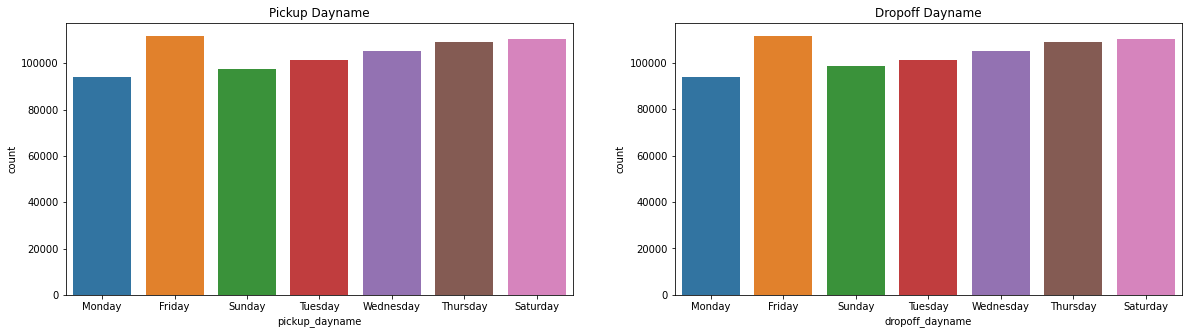

In [39]:

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Dayname')
ax=sns.countplot(x="pickup_dayname",data=df,ax=ax1)

ax2.set_title('Dropoff Dayname')
ax=sns.countplot(x="dropoff_dayname",data=df,ax=ax2)

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.



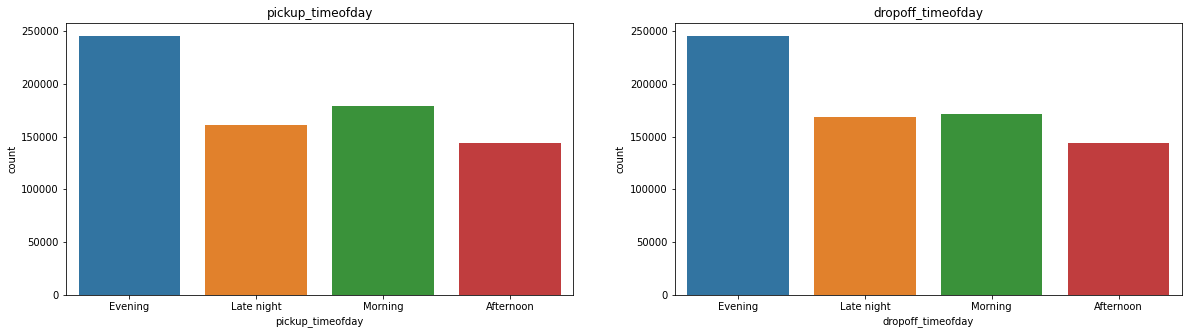

In [110]:

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('pickup_timeofday')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax1)

ax2.set_title('dropoff_timeofday')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax2)

As we saw above, evenings are the busiest.

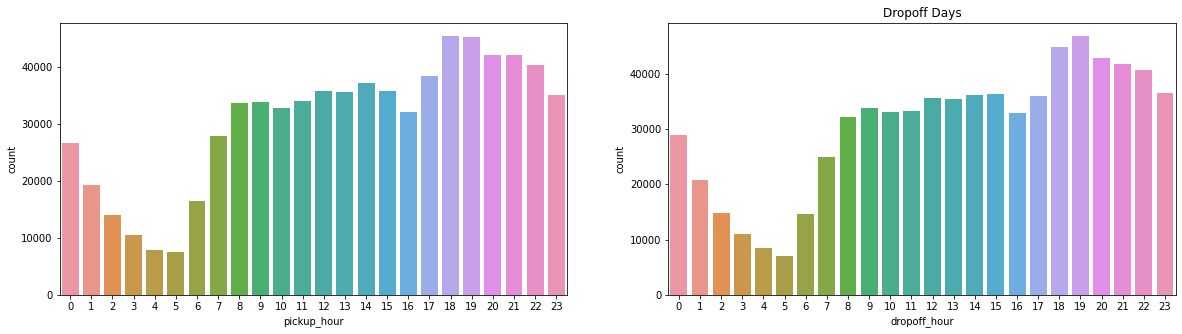

In [40]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)


We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.


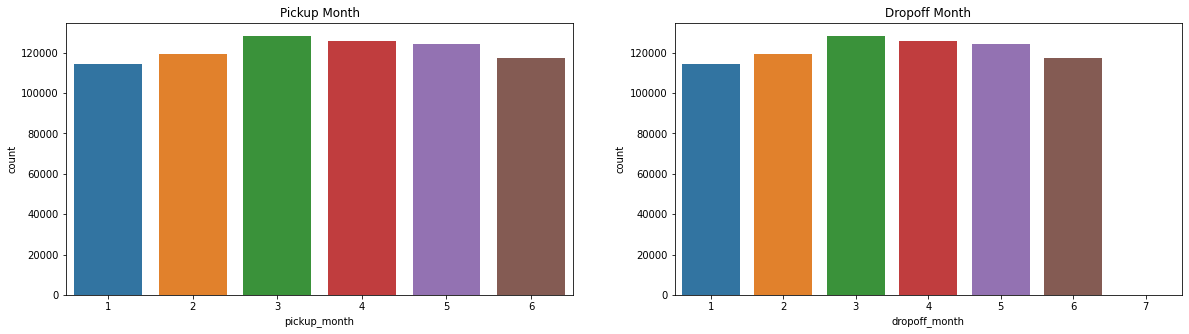

In [41]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

There is not much difference in the number of trips across months.

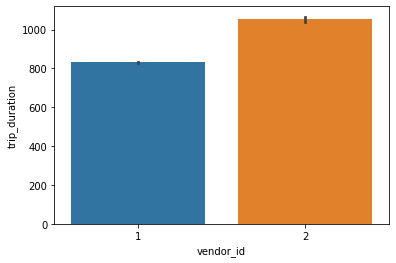

In [42]:
#Bivariate Analysis
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

endor id 2 takes longer trips as compared to vendor 1.

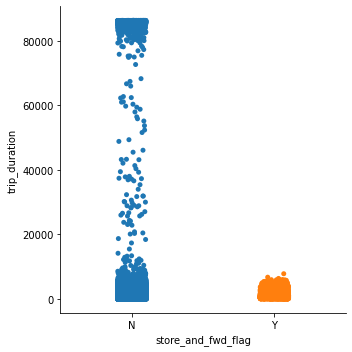

In [43]:

sns.catplot(data=df, x="store_and_fwd_flag", y="trip_duration",kind="strip")

Trip duration is generally longer for trips whose flag was not stored.

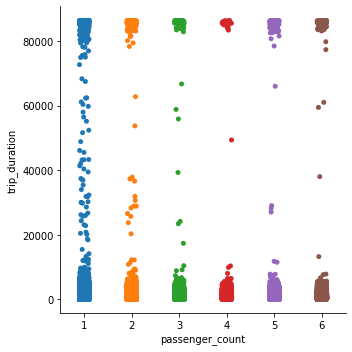

In [44]:
sns.catplot(y="trip_duration",x="passenger_count",data=df,kind="strip")

Trip duration is generally longer for trips whose flag was not stored.

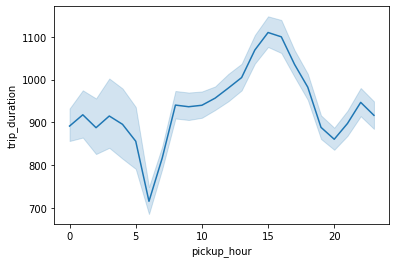

In [45]:
sns.lineplot(x="pickup_hour",y="trip_duration",data=df)

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy.

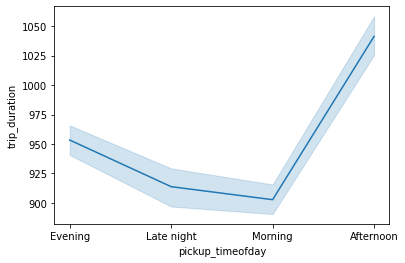

In [46]:
sns.lineplot(x="pickup_timeofday",y="trip_duration",data=df)

As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning

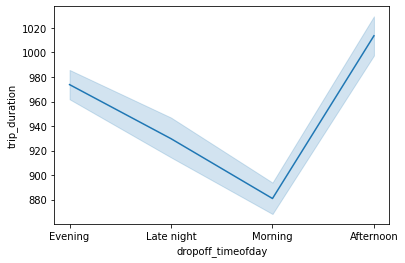

In [47]:

sns.lineplot(x="dropoff_timeofday",y="trip_duration",data=df)


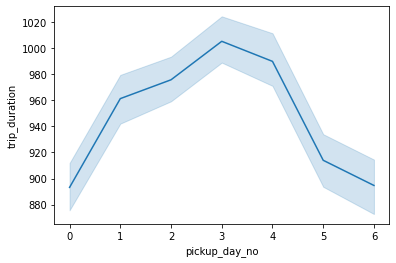

In [48]:
sns.lineplot(x="pickup_day_no",y="trip_duration",data=df)

In [114]:
#Trip duration is the longest on Thursdays closely followed by Fridays.

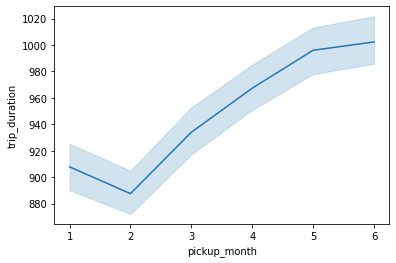

In [49]:
sns.lineplot(x="pickup_month",y="trip_duration",data=df)

In [115]:
#From February, we can see trip duration rising every month.

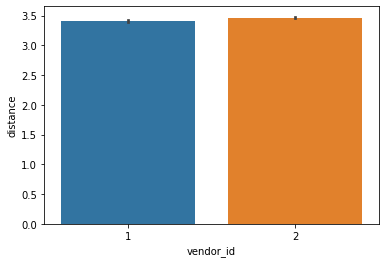

In [50]:
sns.barplot(y="distance",x="vendor_id",data=df,estimator=np.mean)

The distribution for both vendors is very similar.

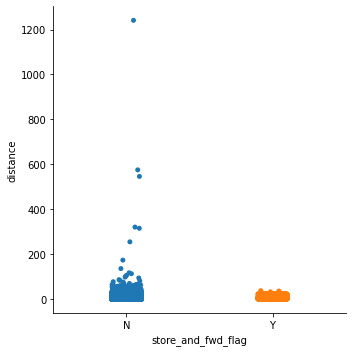

In [51]:
sns.catplot(y="distance",x="store_and_fwd_flag",data=df,kind="strip")

We see for longer distances the trip is not stored.

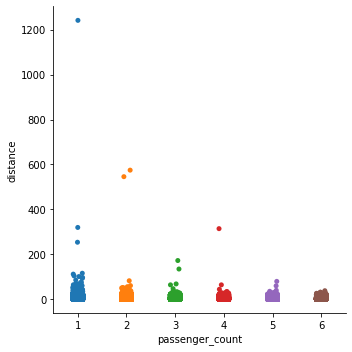

In [52]:
sns.catplot(y="distance",x="passenger_count",data=df,kind="strip")


We see some of the longer distances are covered by either 1 or 2 or 4 passenger rides.

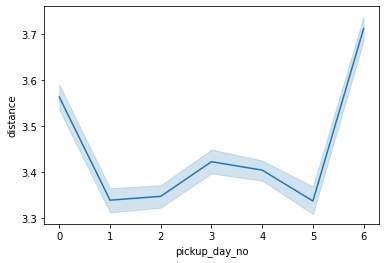

In [53]:
sns.lineplot(x="pickup_day_no",y="distance",data=df)

Distances are longer on Sundays probably because it’s weekend.
Monday trip distances are also quite high.
This probably means that there can be outstation trips on these days and/or the streets are busier.

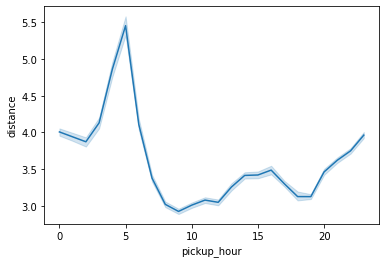

In [54]:
sns.lineplot(x="pickup_hour",y="distance",data=df)

Distances are the longest around 5 am.|

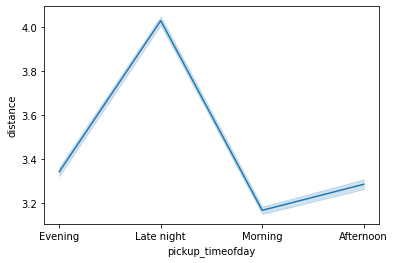

In [55]:
sns.lineplot(x="pickup_timeofday",y="distance",data=df)

distances being the longest during late night or it maybe called as early morning too.
This can probably point to outstation trips where people start early for the day.

 

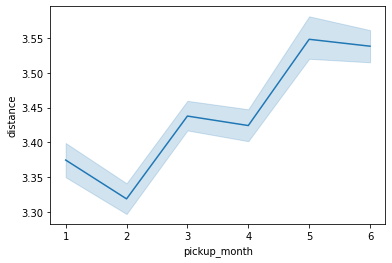

In [56]:
sns.lineplot(x='pickup_month',y='distance',data=df)

As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.

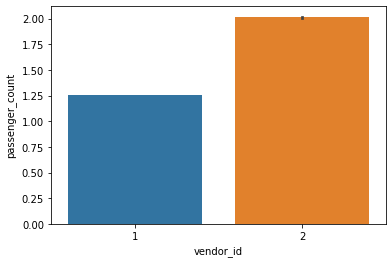

In [57]:
sns.barplot(y='passenger_count',x='vendor_id',data=df)

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

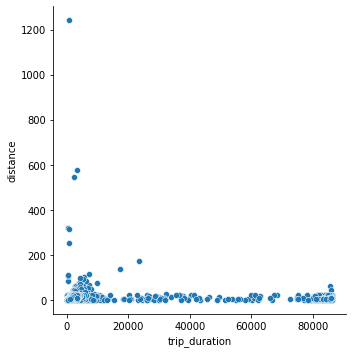

In [58]:
sns.relplot(y="distance",x='trip_duration',data=df)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

Let us see few rows whose distances are 0.

In [116]:
df[df["distance"]==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_day,dropoff_dayname,dropoff_day_no,dropoff_hour,dropoff_month,dropoff_day,distance,pickup_timeofday,dropoff_timeofday
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,6,28,Tuesday,1,11,6,28,0.0,Morning,Morning
327,id0786923,2,2016-03-26 13:34:00,2016-03-26 13:37:00,1,-73.996323,40.753460,-73.996323,40.753460,N,...,3,26,Saturday,5,13,3,26,0.0,Afternoon,Afternoon
795,id2323213,2,2016-06-13 16:49:00,2016-06-13 17:04:00,5,-73.967171,40.763500,-73.967171,40.763500,N,...,6,13,Monday,0,17,6,13,0.0,Evening,Evening
1176,id3235868,1,2016-02-29 21:39:00,2016-02-29 21:44:00,1,-73.995232,40.744038,-73.995232,40.744038,N,...,2,29,Monday,0,21,2,29,0.0,Evening,Evening
1257,id1865738,2,2016-03-13 11:38:00,2016-03-13 12:00:00,2,-73.912781,40.804428,-73.912781,40.804428,N,...,3,13,Sunday,6,12,3,13,0.0,Morning,Afternoon


We can see even though distance is recorded as 0 but trip duration is definitely more.

One reason can be that the dropoff coordinates weren’t recorded.
Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

In [ ]:
df["pickup_latitude_round"]=df['pickup_latitude'].apply(lambda x:round(x,2))
df["pickup_longitude_round"]=df['pickup_longitude'].apply(lambda x:round(x,2))

df["dropoff_longitude_round"]=df['dropoff_longitude'].apply(lambda x:round(x,2))
df["dropoff_latitude_round"]=df['dropoff_latitude'].apply(lambda x:round(x,2))

pickup = df.groupby(['pickup_latitude_round','pickup_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})

pickup

,pickup_latitude_round,pickup_longitude_round,Num_Trips
0,34.71,-75.35,1
1,35.31,-72.07,1
2,37.39,-121.93,1
3,37.78,-77.90,1
4,38.90,-77.04,1
...,...,...,...
804,42.46,-70.51,1
805,43.14,-72.59,1
806,43.49,-74.20,1
807,43.91,-71.88,1


In [ ]:
import folium
from folium.plugins import HeatMap

# Setting up new york coordinates
pickup_map = folium.Map(location = [40.730610,-73.935242], zoom_start = 10)

heatmap = HeatMap(list(zip(pickup.pickup_latitude_round.values, 
                           pickup.pickup_longitude_round.values,
                           pickup.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 5, blur = 10,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map